## In-class Activity

These questions and tasks provide a comprehensive framework for you to explore and build a multiple linear regression predictive model within a 40-minute timeframe. 

### Import all your necessary libraries

In [1]:
#Add missing packages
import pandas as pd
from sklearn.preprocessing import LabelEncoder

## Load your Dataset

**[Infrared Thermography Temperature](https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset)**
The Infrared Thermography Temperature Dataset contains temperatures read from various locations of inferred images about patients, with the addition of oral temperatures measured for each individual.

**The target variable are 'aveOralF and	aveOralM'**

In [2]:
# Install the ucimlrepo package 
!pip install ucimlrepo

**Import the dataset into your code**

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
infrared_thermography_temperature = fetch_ucirepo(id=925) 
  
# data (as pandas dataframes) 
X_variables_ = infrared_thermography_temperature.data.features 
y_ = infrared_thermography_temperature.data.targets 

Infrared_Tem_Data = pd.concat([X_variables_, y_], axis=1)

In [4]:
y_

,aveOralF,aveOralM
0,36.85,36.59
1,37.00,37.19
2,37.20,37.34
3,36.85,37.09
4,36.80,37.04
...,...,...
1015,36.95,36.99
1016,37.25,37.19
1017,37.35,37.59
1018,37.15,37.29


In [5]:
# Display the combined DataFrame
Infrared_Tem_Data.head(3)

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralF,aveOralM
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.85,36.59
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.00,37.19
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.20,37.34


### 1 Describe the dataset

1. How many features (independent variables) and observations (data points) are there?

In [6]:
# Check the shape of the DataFrame
num_rows, num_columns = Infrared_Tem_Data.shape

print("Number of features (independent variables):", num_columns)
print("Number of observations (data points):", num_rows)


Number of features (independent variables): 35
Number of observations (data points): 1020


2. What are the data types of each feature (numerical, categorical, etc.)?

In [7]:
# Check the data types of each feature
feature_data_types = Infrared_Tem_Data.dtypes

print("Data types of each feature:")
print(feature_data_types)


Data types of each feature:
Gender          object
Age             object
Ethnicity       object
T_atm          float64
Humidity       float64
Distance       float64
T_offset1      float64
Max1R13_1      float64
Max1L13_1      float64
aveAllR13_1    float64
aveAllL13_1    float64
T_RC1          float64
T_RC_Dry1      float64
T_RC_Wet1      float64
T_RC_Max1      float64
T_LC1          float64
T_LC_Dry1      float64
T_LC_Wet1      float64
T_LC_Max1      float64
RCC1           float64
LCC1           float64
canthiMax1     float64
canthi4Max1    float64
T_FHCC1        float64
T_FHRC1        float64
T_FHLC1        float64
T_FHBC1        float64
T_FHTC1        float64
T_FH_Max1      float64
T_FHC_Max1     float64
T_Max1         float64
T_OR1          float64
T_OR_Max1      float64
aveOralF       float64
aveOralM       float64
dtype: object


3. Are there any missing values? If so, how are they handled?

In [8]:
# Check for missing values
missing_values = Infrared_Tem_Data.isnull().sum()

if missing_values.sum() == 0:
    print("There are no missing values in the dataset.")
else:
    print("Missing values:")
    print(missing_values)


Missing values:
Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       2
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
aveOralF       0
aveOralM       0
dtype: int64


### 2 Correlation Analysis

1. Compute the correlation matrix between the features and the target variable.

In [14]:
import numpy as np
# Exclude non-numeric columns before computing the correlation matrix
numeric_data = Infrared_Tem_Data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Print the correlation matrix
print(correlation_matrix)

# Get the target variable
target_variable = numeric_data['aveOralF']

# Reason for selecting the target variable:
# The target variable 'aveOralF' represents the average oral temperature of the patients. This is a critical physiological measurement that reflects the overall body temperature and can be used to assess a person's health status. By predicting 'aveOralF' using the other features in the dataset, we can gain valuable insights into the relationship between various body temperatures and the oral temperature, which can be useful for medical diagnosis and monitoring.


                T_atm  Humidity  Distance  T_offset1  Max1R13_1  Max1L13_1  \
T_atm        1.000000  0.119270  0.033377   0.616912   0.275363   0.292344   
Humidity     0.119270  1.000000  0.008468   0.224086   0.050884   0.060754   
Distance     0.033377  0.008468  1.000000   0.024831  -0.024479  -0.022900   
T_offset1    0.616912  0.224086  0.024831   1.000000   0.239208   0.260545   
Max1R13_1    0.275363  0.050884 -0.024479   0.239208   1.000000   0.901213   
Max1L13_1    0.292344  0.060754 -0.022900   0.260545   0.901213   1.000000   
aveAllR13_1  0.269869  0.101012 -0.051634   0.237177   0.868731   0.775313   
aveAllL13_1  0.311260  0.112754 -0.054362   0.279728   0.825698   0.896370   
T_RC1        0.287289  0.058080 -0.012427   0.249420   0.981819   0.906892   
T_RC_Dry1    0.280530  0.044929 -0.024331   0.242019   0.995478   0.901218   
T_RC_Wet1    0.317640  0.082547 -0.007114   0.280940   0.942309   0.895895   
T_RC_Max1    0.285080  0.057643 -0.012356   0.247770   0.981113 

2. Identify the features with the highest correlation with the target variable.

In [16]:
# Extract correlations between features and the target variable
target_correlation = correlation_matrix['aveOralF']

# Sort the correlations in descending order
sorted_correlation = target_correlation.abs().sort_values(ascending=False)

# Print the features with the highest correlation with the target variable
print("Features with the highest correlation with the target variable:")
print(sorted_correlation)


Features with the highest correlation with the target variable:
aveOralF       1.000000
aveOralM       0.884728
T_Max1         0.752546
T_OR1          0.718840
T_OR_Max1      0.718513
canthiMax1     0.673136
canthi4Max1    0.672514
T_RC_Max1      0.664864
T_RC1          0.664154
T_RC_Wet1      0.654099
T_RC_Dry1      0.643588
Max1R13_1      0.637134
T_LC_Max1      0.633186
T_LC1          0.633009
T_LC_Dry1      0.627341
Max1L13_1      0.621410
RCC1           0.611695
T_LC_Wet1      0.611027
LCC1           0.586546
T_FH_Max1      0.560117
aveAllL13_1    0.540581
aveAllR13_1    0.534192
T_FHC_Max1     0.502194
T_FHBC1        0.472456
T_FHCC1        0.433403
T_FHRC1        0.425942
T_FHLC1        0.399649
T_FHTC1        0.382936
T_offset1      0.117794
T_atm          0.070825
Humidity       0.047200
Distance       0.016166
Name: aveOralF, dtype: float64


3. Visualize the correlation matrix using a heatmap.

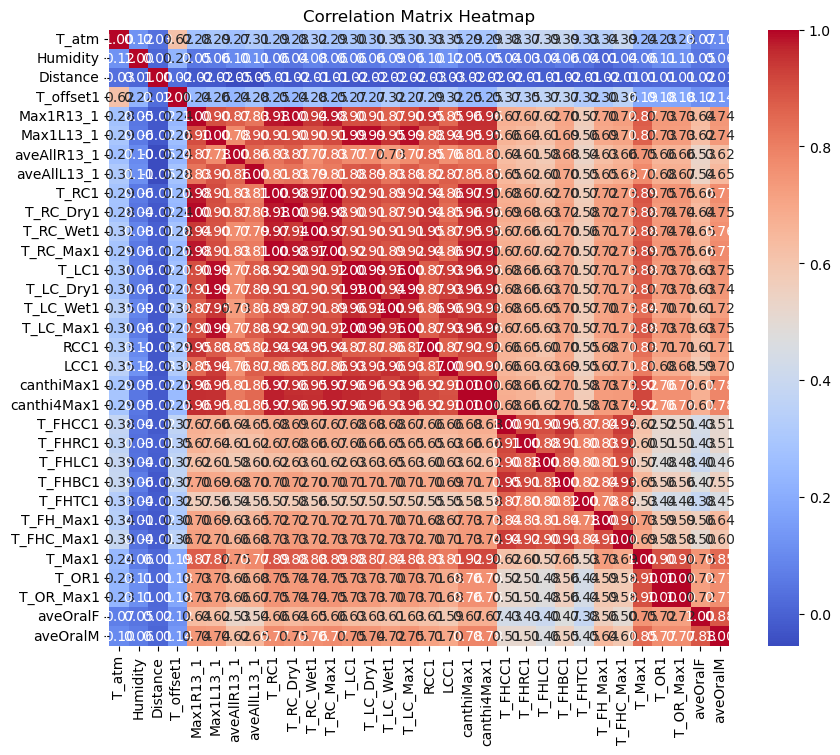

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


### 3. Feature Selection

1. Are there any categorical variables that need to be encoded? If so, which encoding method will you use? Implement your method

**Help in using the label encoder**


In [21]:
import pandas as pd

# Sample data
data = {'place': ['A', 'B', 'C', 'A', 'B'],
        'origin': ['X', 'Y', 'Z', 'X', 'Y']}

# Create DataFrame 'kat'
kat = pd.DataFrame(data)

# Perform one-hot encoding for 'place' and 'origin'
encoded_kat = pd.get_dummies(kat, columns=['place', 'origin'])

# Display the encoded DataFrame
print(encoded_kat)


   place_A  place_B  place_C  origin_X  origin_Y  origin_Z
0     True    False    False      True     False     False
1    False     True    False     False      True     False
2    False    False     True     False     False      True
3     True    False    False      True     False     False
4    False     True    False     False      True     False


In [22]:
import pandas as pd

# Perform one-hot encoding for 'place' and 'origin'
encoded_kat = pd.get_dummies(kat, columns=['place', 'origin'])

# Display the encoded DataFrame
print(encoded_kat)


   place_A  place_B  place_C  origin_X  origin_Y  origin_Z
0     True    False    False      True     False     False
1    False     True    False     False      True     False
2    False    False     True     False     False      True
3     True    False    False      True     False     False
4    False     True    False     False      True     False


In [24]:
# Assuming 'place' and 'origin' are categorical columns in a DataFrame called 'kat' 

#Step1: creat your encode
encoder = LabelEncoder()

#Step 2: Encode 'place' column
kat['place'] = encoder.fit_transform(kat['place'])

#Step 3: Encode 'Ethnicity' column
kat['origin'] = encoder.fit_transform(kat['origin'])

# Display the updated DataFrame after encoding

**Help on tranforming the age**

From your dataset it seems the age is in range

This code can help you convert the range values in the 'Age' column to numerical values by taking the average of the range. Note it return 65 for the '>60' age range

In [46]:
# Define a function to convert age range to numeric value
def convert_age_range_to_numeric(age_range):
    # Check if the age range is '>60'
    if age_range == '>60':
        return 65  # Assign an arbitrary value (e.g., the maximum age in the range)
    # Otherwise, split the age range into two values and calculate the average
    age_values = age_range.split('-')
    age_numeric = (int(age_values[0]) + int(age_values[1])) / 2
    return age_numeric

# Assuming you have a column named 'age_range' containing age ranges
# Apply the function to the 'age_range' column
kat['Age'] = kat['age_range'].apply(convert_age_range_to_numeric)

# Display the updated DataFrame
print(kat)


KeyError: 'age_range'

In [25]:
# Assuming 'Age' is a column in DataFrame called 'kat'

# Define a function to convert range to numerical value
def convert_age_range_to_numeric(age_range):
    # Check if the age range is '>60'
    if age_range == '>60': #the maximum aga is set to >60 in the dataset
        return 65  # Assign an arbitrary value (e.g., the maximum age in the range)
    # Otherwise, split the age range into two values and calculate the average
    age_values = age_range.split('-')
    age_numeric = (int(age_values[0]) + int(age_values[1])) / 2
    return age_numeric

# Apply the function to the 'Age' column
kat['Age'] = kat['Age'].apply(convert_age_range_to_numeric)

# Display the updated DataFrame

KeyError: 'Age'

2. Should any features be transformed (e.g., scaling numerical features)? If so, which scaling method will you use? Implement it.

In [31]:
X_varables_SLR = Infrared_Tem_Data["T_Max1"]. values
X_varables_MLR = Infrared_Tem_Data.drop (["aveOralF", "aveOralM"], axis =1)
Y_variable_veOralF = Infrared_Tem_Data["aveOralF"].values
Y2_variable_aveOralM =Infrared_Tem_Data["aveOralM"]. values

In [35]:
max = X_varables_SLR.max()
X_varables_SLR_scaled = X_varables_SLR/max

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#Let scale X_varables_ SLR
scaler = MinMaxScaler()
X_varables_MLR_scaled = scaler.fit_transform(X_varables_MLR)

In [ ]:
varables_SLR_scaled_reshape = X_varables_SLR_scaled. reshape(-1,1)
y_variables[reshape] = y_variables.reshape(-1,1)

Reshape Data for simple linear regression

In [44]:
X_varables_SLR_scaled_reshape = X_varables_SLR_scaled.reshape(-1,1)
Y_variable_veOralF_reshape = Y_variable_veOralF.reshape(-1,1)
Y2_variable_aveOralM_reshape = Y2_variable_aveOralM.reshape(-1,1)

### 4. Model Building

1. Split the dataset into training and testing sets.

2. Build a baseline model (SLR_Model) using simple linear regression with one feature to predict aveOralF and aveOralM seperately.

3. Build a multiple linear regression model (MLR_Model) using all features aveOralF and aveOralM seperately.

4. Evaluate the performance of both models using appropriate metrics (e.g., MSE or RMSE and R-squared).

5. Compare the performance of the baseline model and the multiple linear regression model.

    5.1 Based on the your calculate the R-squared value: How well does the models explain the variance in the target variable?

    5.2 Analyze the coefficients of the model: Do the signs and magnitudes of the coefficients make sense given the relationships observed in the exploration?

    5.3 Which features have the most significant impact on the target variable?
    

    5.4 Are there any features with statistically insignificant coefficients?

    5.5 Assess the overall performance of the multiple linear regression model and identify areas for improvement.

### 6. Reflection

1. Summarize your findings and insights from the exploration and modeling process.
2. Reflect on any challenges encountered and how they were addressed.
3. Discuss any potential next steps for improving the model.